<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

---

## Problem Statement

The year is 2019 and some schools in California are struggling with performance and participation. This project aims to identify schools for the state to optimize its resources' allocation to improve these metrics, based on their scores and percentage of participation in standardized tests.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Context

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process.

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Yet, they still represent a parameter to evaluate students' performance, since it applies the same metrics to everyone.

In this project, standardized tests scores and participation proportions will be used to identify schools for California resources optimization. The standardized test mostly used in California will be used in the analysis. Schools that have scores and participation below the median of the state and will be prioritized according to the number of students enrolled in the respective schools, to reach the maximum number of students with this strategy.

--- 
# Part 2


---

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

In [2]:
act_ca = pd.read_csv('../data/act_2019_ca.csv')
act_ca.columns = act_ca.columns.str.lower().str.replace(' ','_')

sat_ca = pd.read_csv('../data/sat_2019_ca.csv')
sat_ca.columns = sat_ca.columns.str.lower().str.replace(' ','_')

In [3]:
sat_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cds                    2579 non-null   float64
 1   ccode                  2579 non-null   float64
 2   cdcode                 2579 non-null   float64
 3   scode                  2579 non-null   float64
 4   rtype                  2579 non-null   object 
 5   sname                  1982 non-null   object 
 6   dname                  2521 non-null   object 
 7   cname                  2579 non-null   object 
 8   enroll12               2579 non-null   float64
 9   numtsttakr12           2579 non-null   float64
 10  numerwbenchmark12      2304 non-null   object 
 11  pcterwbenchmark12      2304 non-null   object 
 12  nummathbenchmark12     2304 non-null   object 
 13  pctmathbenchmark12     2304 non-null   object 
 14  enroll11               2579 non-null   float64
 15  numt

In [4]:
act_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cds          2309 non-null   float64
 1   ccode        2309 non-null   float64
 2   cdcode       2309 non-null   float64
 3   scode        1787 non-null   float64
 4   rtype        2309 non-null   object 
 5   sname        1729 non-null   object 
 6   dname        2251 non-null   object 
 7   cname        2309 non-null   object 
 8   enroll12     2309 non-null   float64
 9   numtsttakr   2309 non-null   float64
 10  avgscrread   1953 non-null   object 
 11  avgscreng    1953 non-null   object 
 12  avgscrmath   1953 non-null   object 
 13  avgscrsci    1953 non-null   object 
 14  numge21      1953 non-null   object 
 15  pctge21      1953 non-null   object 
 16  year         2309 non-null   object 
 17  unnamed:_17  0 non-null      float64
dtypes: float64(7), object(11)
memory usage: 325.0+ K

In [5]:
sat_ca.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr12,...,numerwbenchmark11,pcterwbenchmark11,nummathbenchmark11,pctmathbenchmark11,totnumbothbenchmark12,pctbothbenchmark12,totnumbothbenchmark11,pctbothbenchmark11,year,unnamed:_25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [6]:
act_ca.head()

,cds,ccode,cdcode,scode,rtype,sname,dname,cname,enroll12,numtsttakr,avgscrread,avgscreng,avgscrmath,avgscrsci,numge21,pctge21,year,unnamed:_17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


The datasets have rows for the respective schools, districts, counties and the state, with the column 'rtype' identifying which geographical level it represents.

In [7]:
sat_ca['rtype'].value_counts()

S    1981
D     539
C      58
X       1
Name: rtype, dtype: int64

In [8]:
act_ca['rtype'].value_counts()

S    1728
D     522
C      58
X       1
Name: rtype, dtype: int64

The most granular level is schools, which combine to form the districts, and then counties and at last form the state. To retain most of the information, I will select schools rows and aggregate from that if I have to. Retaining the most granular information is also necessary for the program to have a more localized effect, and to track the progress.

First of all, it is necessary to define which test to consider, if not both. For that, I will check the attendance of both of them overall and see if it's a pattern in the whole state or if some districts have a different pattern.

In [9]:
# What are the SAT and ACT nunmbers of test takers?
print('The number of SAT takers in California is {}'.format(int(sat_ca[sat_ca['rtype']=='S']['numtsttakr12'].sum())))
print('The number of ACT takers in California is {}'.format(int(act_ca[act_ca['rtype']=='S']['numtsttakr'].sum())))

The number of SAT takers in California is 170337
The number of ACT takers in California is 82654


There are more SAT takers overall in California, but there is still a reasonable number of ACT takers, maybe in a more granular level there is a different pattern... Let's see if there are schools with higher participation in ACT. To be able to analyze schools' performance and attendance, if there are schools with higher attendance in ACT, the information used will be from it.

To do it, I will merge both datasets and compare the attendance and scores of both tests at the schools' level.
To merge, it is necessary for the different datasets to have in common a certain column that identifies which school the observation is about.

In [10]:
unique_scode_sat = set(sat_ca['scode'].unique())
unique_scode_act = set(act_ca['scode'].unique())

common_values = unique_scode_sat.intersection(unique_scode_act)
print('There are {} school codes in common between ACT and SAT datasets'.format(len(common_values)))

There are 1720 school codes in common between ACT and SAT datasets


In [11]:
print('The shape of SAT dataset with only schools is: ',sat_ca[sat_ca['rtype']=='S'].shape)
print('The shape of ACT dataset with only schools is: ',act_ca[act_ca['rtype']=='S'].shape)

print('There are {} unique school codes in SAT dataset.'.format(sat_ca[sat_ca['rtype']=='S']['scode'].nunique()))
print('There are {} unique school codes in ACT dataset.'.format(act_ca[act_ca['rtype']=='S']['scode'].nunique()))

The shape of SAT dataset with only schools is:  (1981, 26)
The shape of ACT dataset with only schools is:  (1728, 18)
There are 1981 unique school codes in SAT dataset.
There are 1728 unique school codes in ACT dataset.


It is confirmed that all rows in SAT and ACT datasets with only schools are of different schools, there are no school duplicates.

There are 1720 schools codes in common, it means there are other 261 school codes in SAT dataset not present in ACT dataset and 8 vice-versa. Let's merge the datasets keeping all school codes.

In [12]:
df_merged = pd.merge(sat_ca[sat_ca['rtype']=='S'], act_ca[act_ca['rtype']=='S'], how='outer', on='scode', suffixes=('_sat', '_act'))
df_merged.columns

Index(['cds_sat', 'ccode_sat', 'cdcode_sat', 'scode', 'rtype_sat', 'sname_sat',
       'dname_sat', 'cname_sat', 'enroll12_sat', 'numtsttakr12',
       'numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12',
       'pctmathbenchmark12', 'enroll11', 'numtsttakr11', 'numerwbenchmark11',
       'pcterwbenchmark11', 'nummathbenchmark11', 'pctmathbenchmark11',
       'totnumbothbenchmark12', 'pctbothbenchmark12', 'totnumbothbenchmark11',
       'pctbothbenchmark11', 'year_sat', 'unnamed:_25', 'cds_act', 'ccode_act',
       'cdcode_act', 'rtype_act', 'sname_act', 'dname_act', 'cname_act',
       'enroll12_act', 'numtsttakr', 'avgscrread', 'avgscreng', 'avgscrmath',
       'avgscrsci', 'numge21', 'pctge21', 'year_act', 'unnamed:_17'],
      dtype='object')

The main group of interest in this analysis are the students in grade 12, when most students take the test. So columns ending with 11 will be removed, since they will not be considered. ACT data is already about this group, as specified in the [data dictionary](https://web.archive.org/web/20210831222336/https://www.cde.ca.gov/ds/sp/ai/reclayoutact19.asp). 

In [13]:
# deleting columns ending with '11'
columns_to_drop = [col for col in df_merged.columns if col.endswith('11')]
df_merged.drop(columns=columns_to_drop, inplace=True)

In [14]:
# sat takers is the variable numtsttakr12 and act takers is the variable numtsttakr
# how many schools have taken mostly act??
df_merged[df_merged['numtsttakr12']<df_merged['numtsttakr']].shape

(198, 35)

There are 198 schools with more students taking the ACT than the SAT. To better understand schools' performance, it is more realistic to evaluate the scores of the most popular test in each school. I will first differentiate and create datasets to represent this preference, select the scores to analyze and concatenate both datasets.

There are 9 ```numtsttakr``` 

In [15]:
sat_schools = df_merged[(df_merged['numtsttakr12']>=df_merged['numtsttakr']) | df_merged['numtsttakr'].isna()]
act_schools = df_merged[(df_merged['numtsttakr12']<df_merged['numtsttakr']) | df_merged['numtsttakr12'].isna()]

In [16]:
sat_schools.columns

Index(['cds_sat', 'ccode_sat', 'cdcode_sat', 'scode', 'rtype_sat', 'sname_sat',
       'dname_sat', 'cname_sat', 'enroll12_sat', 'numtsttakr12',
       'numerwbenchmark12', 'pcterwbenchmark12', 'nummathbenchmark12',
       'pctmathbenchmark12', 'totnumbothbenchmark12', 'pctbothbenchmark12',
       'year_sat', 'unnamed:_25', 'cds_act', 'ccode_act', 'cdcode_act',
       'rtype_act', 'sname_act', 'dname_act', 'cname_act', 'enroll12_act',
       'numtsttakr', 'avgscrread', 'avgscreng', 'avgscrmath', 'avgscrsci',
       'numge21', 'pctge21', 'year_act', 'unnamed:_17'],
      dtype='object')

The program will evaluate the overall score in the test, not differencing between sections of the tests. For the SAT, it is the the percentage of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12 (```'pctbothbenchmark12'```).  For the ACT, is it the percentage of Test Takers Whose ACT Composite Scores Are Greater or Equal to 21 (```'pctge21'```).

In [17]:
sat_schools = sat_schools[['scode', 'sname_sat','dname_sat', 'cname_sat', 'enroll12_sat','numtsttakr12',\
                       'pctbothbenchmark12']].copy()
sat_schools.rename(columns={'scode': 'school_code', 'dname_sat': 'district', 'cname_sat':'county',\
                   'sname_sat':'school_name', 'enroll12_sat':'enrollment', 'numtsttakr12':'test_takers',
                   'pctbothbenchmark12':'percent_achieved'}, inplace=True)

In [18]:
act_schools = act_schools[['scode', 'sname_act', 'dname_act', 'cname_act', 'enroll12_act', 'numtsttakr',\
                           'pctge21']].copy()

act_schools.rename(columns={'scode': 'school_code', 'dname_act': 'district', 'cname_act':'county',\
                   'sname_act':'school_name', 'enroll12_act':'enrollment','numtsttakr':'test_takers',\
                   'pctge21':'percent_achieved'}, inplace=True)

In [19]:
print(sat_schools.shape)
print(act_schools.shape)
print('SAT and ACT datasets add to {} rows'.format(sat_schools.shape[0] + act_schools.shape[0]))

(1783, 7)
(207, 7)
SAT and ACT datasets add to 1990 rows


In [20]:
sat_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1783 entries, 0 to 1980
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_code       1783 non-null   float64
 1   school_name       1783 non-null   object 
 2   district          1783 non-null   object 
 3   county            1783 non-null   object 
 4   enrollment        1783 non-null   float64
 5   test_takers       1783 non-null   float64
 6   percent_achieved  1566 non-null   object 
dtypes: float64(3), object(4)
memory usage: 111.4+ KB


In [21]:
act_schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 13 to 1989
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_code       207 non-null    float64
 1   school_name       207 non-null    object 
 2   district          207 non-null    object 
 3   county            207 non-null    object 
 4   enrollment        207 non-null    float64
 5   test_takers       207 non-null    float64
 6   percent_achieved  207 non-null    object 
dtypes: float64(3), object(4)
memory usage: 12.9+ KB


The column of the percentage of students who achieved the desired grades have object as dtype, let's check that...

In [22]:
sat_schools['percent_achieved'].unique()[:5]

array([nan, '*', '13.73', '15.93', '33.96'], dtype=object)

In [23]:
act_schools['percent_achieved'].unique()[:5]

array(['22.22', '27.84', '93.99', '*', '17.95'], dtype=object)

It is specified in [ACT data dictionary](https://web.archive.org/web/20210831222336/https://www.cde.ca.gov/ds/sp/ai/reclayoutact19.asp) that ```*``` is for schools with 14 or fewer students taking the ACT. Maybe these schools with ```*``` or ```null``` as values for the percentage are small schools and, for this project's purpose, removing these will not be a problem.

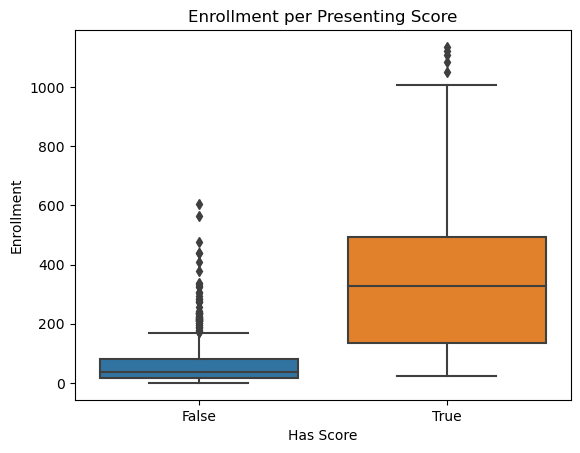

In [24]:
sat_schools['has_score'] = ((sat_schools['percent_achieved'].notna()) & (sat_schools['percent_achieved'] != '*'))*1

sns.boxplot(data=sat_schools, x='has_score', y='enrollment')
plt.title('Enrollment per Presenting Score')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Has Score')
plt.ylabel('Enrollment');

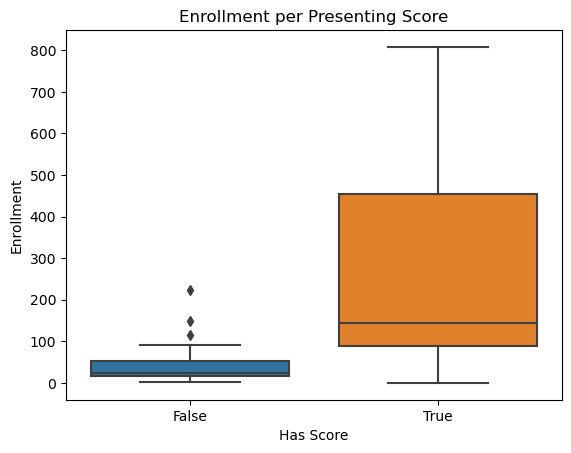

In [25]:
act_schools['has_score'] = ((act_schools['percent_achieved'].notna()) & (act_schools['percent_achieved'] != '*'))*1

sns.boxplot(data=act_schools, x='has_score', y='enrollment')
plt.title('Enrollment per Presenting Score')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.xlabel('Has Score')
plt.ylabel('Enrollment');

Schools with missing scores in both datasets have considerably smaller enrollments compared to those that do have scores. Given the program's objective to maximize benefits for students, the analysis will not consider schools that do not have score. These will be removed from the study, but it is recommended to have a closer look when possible.

In [26]:
sat_schools = sat_schools[sat_schools['has_score']==True]
act_schools = act_schools[act_schools['has_score']==True]

In [27]:
schools = pd.concat([sat_schools, act_schools])
schools['percent_achieved'] = schools['percent_achieved'].astype(float)
schools.head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
2,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,13.73,1
3,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,15.93,1
5,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,33.96,1
6,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,69.47,1
7,3336955.0,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,11.76,1


To also evaluate attendance of these tests, I will create a variable with the proportion of test takers in the enrollment.

In [28]:
# Creating a column with the percentage of students who took SAT
schools['percent_takers'] = schools['test_takers']/schools['enrollment']
schools.drop(columns='has_score', inplace=True)

schools.head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,percent_takers
2,1930924.0,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,13.73,0.495146
3,1931476.0,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,15.93,0.497797
5,6061451.0,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,33.96,0.638554
6,3034956.0,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,69.47,0.338078
7,3336955.0,Abraham Lincoln Continuation,Riverside Unified,Riverside,114.0,17.0,11.76,0.149123


In [29]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 2 to 1987
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   school_code       1283 non-null   float64
 1   school_name       1283 non-null   object 
 2   district          1283 non-null   object 
 3   county            1283 non-null   object 
 4   enrollment        1283 non-null   float64
 5   test_takers       1283 non-null   float64
 6   percent_achieved  1283 non-null   float64
 7   percent_takers    1283 non-null   float64
dtypes: float64(5), object(3)
memory usage: 90.2+ KB


### Data Dictionary

|Feature|Type|Description|
|---|---|---|
|school_code|float|code of the school|
|school_name|object|name of the school|
|district|object|name of the district of the school|
|county|object|name of the county of the school|
|enrollment|object|number of students enrolled in grade 12|
|test_takers|float| number of students who took the test preferred for the respective school|
|percent_students|float|Percentage of test takers whose composite scores are greater than the respective test benchmark|
|percent_takers|float|Percentage of test takers in enrollment|

# Exploratory Data Analysis

In [30]:
# creating variables with the median of enrollment and of both benchmark percentages of reported schools
enroll_median = schools['enrollment'].median()
percent_median = schools['percent_achieved'].median()

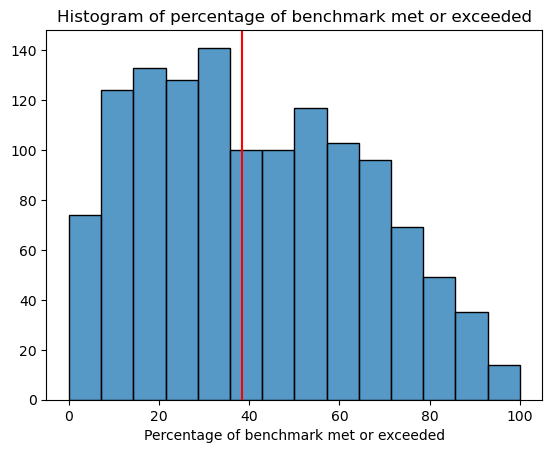

In [31]:
sns.histplot(data = schools, x='percent_achieved')
plt.axvline(x=percent_median, color='r')
plt.xlabel('Percentage of benchmark met or exceeded')
plt.ylabel('')
plt.title('Histogram of percentage of benchmark met or exceeded');

<Figure size 2000x4000 with 0 Axes>

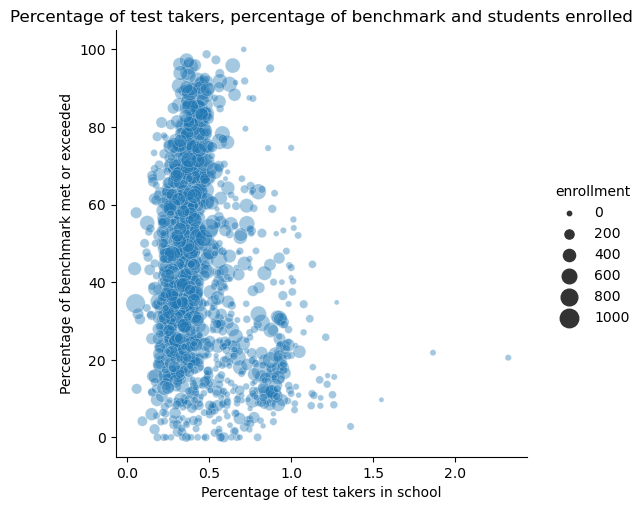

In [32]:
plt.figure(figsize = (20, 40))

sns.relplot(
    data=schools, x="percent_takers", y="percent_achieved",
    size="enrollment", sizes = (10, 200), alpha = 0.4
)

plt.xlabel('Percentage of test takers in school')
plt.ylabel('Percentage of benchmark met or exceeded')
plt.title('Percentage of test takers, percentage of benchmark and students enrolled');

In the graph above it is possible to see that most of schools have test attendance going until 50%. There are schools with percentages greater than 100%, meaning that the number of students who took the test might also consider students enrolled in other grades as well. Let's see if the datasets have observations where the nu,ber of students who took the test are higher than the number of students enrolled in grade 12.

In [47]:
schools[(schools['percent_takers']<0.1) & (schools['enrollment']>800)]

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,percent_takers
1505,3430717.0,Visions In Education,San Juan Unified,Sacramento,1107.0,58.0,34.48,0.052394


In [33]:
act_schools[act_schools['test_takers']>act_schools['enrollment']].head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
111,118497.0,Aspire Langston Hughes Academy,Stockton Unified,San Joaquin,83.0,94.0,18.09,1
207,5235106.0,Los Molinos High,Los Molinos Unified,Tehama,37.0,38.0,23.68,1
407,132100.0,Aspire Richmond Ca. College Preparatory Academy,West Contra Costa Unified,Contra Costa,50.0,59.0,10.17,1
434,112128.0,Aspire Ollin University Preparatory Academy,Los Angeles County Office of Education,Los Angeles,118.0,133.0,11.28,1
525,132282.0,Ednovate - East College Prep,Los Angeles Unified,Los Angeles,79.0,85.0,27.06,1


In [34]:
sat_schools[sat_schools['test_takers']>sat_schools['enrollment']].head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,has_score
782,111856.0,American Indian Public High,Oakland Unified,Alameda,62.0,63.0,53.97,1
975,100602.0,"Lennox Mathematics, Science and Technology Aca...",Lennox,Los Angeles,143.0,144.0,37.50,1
1056,3030608.0,Middle College High,Santa Ana Unified,Orange,86.0,87.0,40.23,1
1527,730291.0,Middle College High,West Contra Costa Unified,Contra Costa,72.0,73.0,56.16,1
1566,1996610.0,Los Angeles Leadership Academy,Los Angeles Unified,Los Angeles,44.0,46.0,10.87,1


For lack of further information on grade 12 participation, let's consider these schools with 100% participation.

In [35]:
schools.loc[schools['percent_takers']>1] = 1

In [36]:
schools[schools['test_takers']>schools['enrollment']].head()

,school_code,school_name,district,county,enrollment,test_takers,percent_achieved,percent_takers


In [43]:
schools[schools['enrollment']==1].shape

(34, 8)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [163]:
schools.sort_values('percent_students', ascending = False).head(10)

,school_code,school_name,district,county,enrollment,test_takers,percent_students,percent_takers
272,112367.0,William & Marian Ghidotti High,Nevada Joint Union High,Nevada,45.0,32.0,100.00,0.711111
1747,1931880.0,Whitney (Gretchen) High,ABC Unified,Los Angeles,165.0,80.0,98.75,0.484848
541,136515.0,Piedmont High,Piedmont City Unified,Alameda,205.0,111.0,97.30,0.541463
364,4334462.0,Monta Vista High,Fremont Union High,Santa Clara,584.0,212.0,97.17,0.363014
1102,4337762.0,Saratoga High,Los Gatos-Saratoga Joint Union High,Santa Clara,321.0,121.0,96.69,0.376947
144,135244.0,Mission San Jose High,Fremont Unified,Alameda,490.0,157.0,96.18,0.320408
1100,4334421.0,Lynbrook High,Fremont Union High,Santa Clara,415.0,172.0,95.93,0.414458
627,106328.0,Canyon Crest Academy,San Dieguito Union High,San Diego,635.0,409.0,95.84,0.644094
389,113118.0,Dougherty Valley High,San Ramon Valley Unified,Contra Costa,766.0,294.0,95.58,0.383812
1736,1995539.0,California Academy of Mathematics and Science,Long Beach Unified,Los Angeles,164.0,143.0,95.10,0.871951


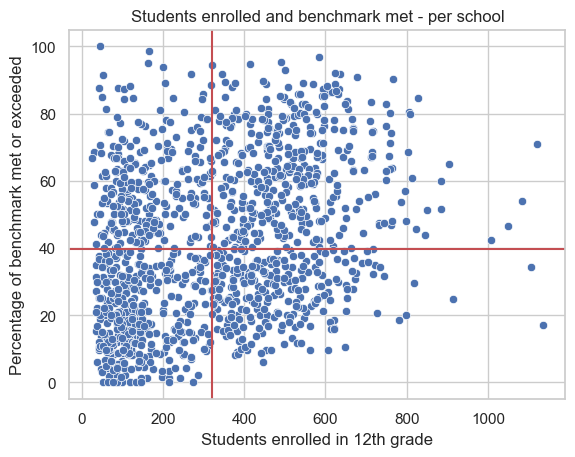

In [44]:
sns.scatterplot(data=sat_schools, x = 'Enroll12', y='PctBothBenchmark12')
plt.axhline(y = percent_median,color='r')
plt.axvline(x=enroll_median, color='r')
plt.ylabel('Percentage of benchmark met or exceeded')
plt.xlabel('Students enrolled in 12th grade')
plt.title('Students enrolled and benchmark met - per school');

In [120]:
worst_counties = first_quad.groupby('CName')[['Enroll12']].sum().sort_values('Enroll12', ascending=False)
worst_counties = worst_counties.reset_index(drop=False)

In [121]:
worst_counties.head()

,CName,Enroll12
0,Los Angeles,23538.0
1,San Diego,3140.0
2,Sacramento,2641.0
3,Fresno,2025.0
4,Contra Costa,1929.0


In [122]:
worst_counties = worst_counties[:10]

In [123]:
worst_counties

,CName,Enroll12
0,Los Angeles,23538.0
1,San Diego,3140.0
2,Sacramento,2641.0
3,Fresno,2025.0
4,Contra Costa,1929.0
5,San Bernardino,1640.0
6,Alameda,1538.0
7,Riverside,1490.0
8,Tulare,1448.0
9,Santa Clara,1448.0


Text(0.5, 1.0, 'Students enrolled of 10 biggest counties in 1st quad')

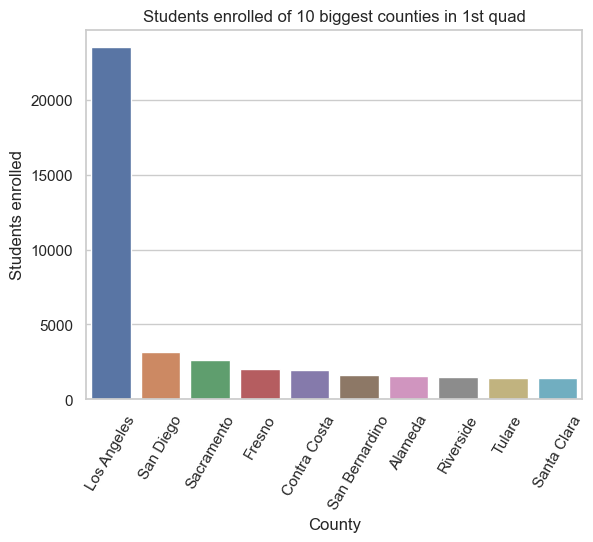

In [142]:
sns.barplot(data = worst_counties, x='CName', y='Enroll12')
plt.xticks(rotation=60)
plt.ylabel('Students enrolled')
plt.xlabel('County')
plt.title('Students enrolled of 10 biggest counties in 1st quad')

In [138]:
worst_counties_4th = fourth_quad.groupby('CName')[['Enroll12']].sum().sort_values('Enroll12', ascending=False)
worst_counties_4th = worst_counties_4th.reset_index(drop=False)

In [139]:
worst_counties_4th = worst_counties_4th[:10]

Text(0.5, 1.0, 'Students enrolled of 10 biggest counties in 4th quad')

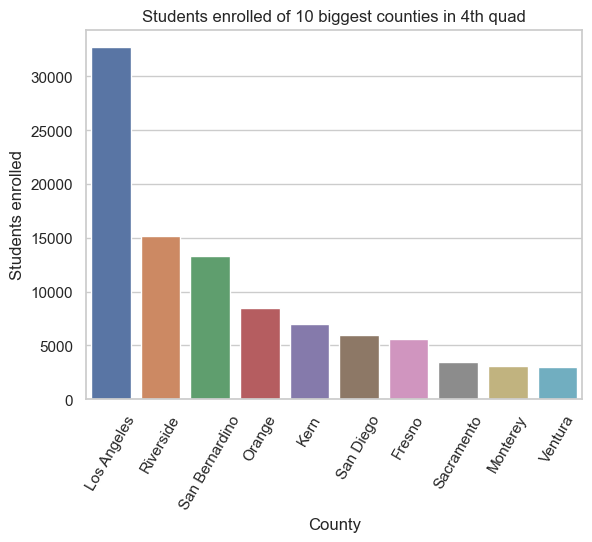

In [143]:
sns.barplot(data = worst_counties_4th, x='CName', y='Enroll12')
plt.xticks(rotation=60)
plt.ylabel('Students enrolled')
plt.xlabel('County')
plt.title('Students enrolled of 10 biggest counties in 4th quad')

# Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**Next Steps**
- Cross Check ACT and SAT in case there are schools doing ACT not present in the data analyzed

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!